In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data file using Pandas
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

In [7]:
#Check for null values in the data. 
df.isna().apply(pd.value_counts).T

,False,True
App,10841.0,NaN
Category,10841.0,NaN
Rating,9367.0,1474.0
Reviews,10841.0,NaN
Size,10841.0,NaN
Installs,10841.0,NaN
Type,10840.0,1.0
Price,10841.0,NaN
Content Rating,10840.0,1.0
Genres,10841.0,NaN


In [8]:
#Get the number of null values for each column.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
#Drop records with nulls in any of the columns. 
df=df.dropna()
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df.shape

(9360, 13)

In [11]:
#4.Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [12]:
#Extract the numeric value from the column
df['Size'] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in df['Size']  ]

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
#Multiply the value by 1,000, if size is mentioned in Mb
df["Size"]=1000*df["Size"]

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [17]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [18]:
df["Reviews"]=df["Reviews"].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1023.8+ KB


In [20]:
#Installs field is currently stored as string and has values like 1,000,000+. 

In [21]:
#Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer
df["Installs"]
df["Installs"]=[int(i.replace('+',',').replace(',','')) if '+'in i or ',' in i else int(0) for i in df["Installs"]]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1023.8+ KB


In [23]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [24]:
df["Price"].unique()
df['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in df['Price'] ]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.8+ KB


In [26]:
#Sanity checks:

In [27]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
df.drop(df[(df['Reviews'] < 1) & (df['Reviews'] > 5 )].index, inplace = True)
df.shape

(9360, 13)

In [28]:
#Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
df[df['Reviews'] > df['Installs']].count()

App               7
Category          7
Rating            7
Reviews           7
Size              7
Installs          7
Type              7
Price             7
Content Rating    7
Genres            7
Last Updated      7
Current Ver       7
Android Ver       7
dtype: int64

In [29]:
df.drop(df[df['Reviews'] > df['Installs']].index,inplace=True)
df.shape

(9353, 13)

In [30]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
df['Type'].unique()
df[(df['Type'] == 'Free') & (df['Price'] > 0)].count()
df.drop(df[(df['Type'] == 'Free') & (df['Price'] > 0)].index,inplace=True)
df.shape

(9353, 13)

In [31]:
#Performing univariate analysis: 

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:xlabel='Price'>

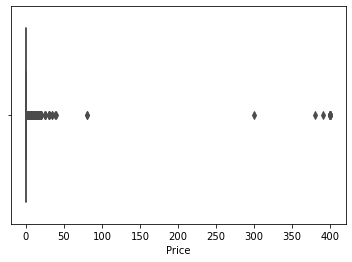

In [33]:
#Boxplot for Price
sns.boxplot(df['Price'],palette="Set1")

<AxesSubplot:xlabel='Reviews'>

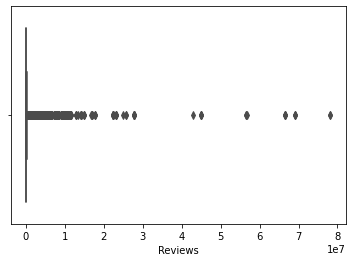

In [34]:
#Boxplot for Reviews
sns.boxplot(df['Reviews'],palette="Set1")

(array([9.227e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00, 2.000e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <BarContainer object of 10 artists>)

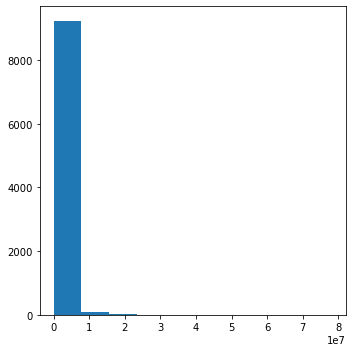

In [35]:
#Histogram for Rating
fig, axs = plt.subplots(1, 1,figsize =(5, 5),tight_layout = True)
axs.hist(df['Reviews'])

(array([4779., 1386., 1036.,  617.,  464.,  334.,  234.,  174.,  125.,
         204.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

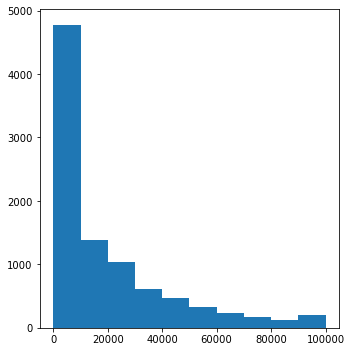

In [36]:
#Histogram for Size
fig, axs = plt.subplots(1, 1,figsize =(5, 5),tight_layout = True)
axs.hist(df['Size'])

In [37]:
#Outlier treatment: 

In [38]:
high_price = df.apply(lambda x : True
            if x['Price'] > 200 else False, axis = 1) 

In [39]:
high_price_count = len(high_price[high_price == True].index) 

In [40]:
df.shape

(9353, 13)

In [41]:
#Price more than 200 is outlier.Drop these as most seem to be junk apps
df.drop(df[df['Price'] > 200].index, inplace = True)

In [42]:
df.shape

(9338, 13)

In [43]:
#There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
df.drop(df[df['Reviews'] > 2000000].index, inplace = True)

In [44]:
df.shape

(8885, 13)

In [45]:
#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
df.quantile([.1, .25, .5, .70, .90, .95, .99], axis = 0) 


,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,0.0,1000.0,0.00
0.25,4.0,159.00,2600.0,10000.0,0.00
0.50,4.3,4290.00,9500.0,500000.0,0.00
0.70,4.5,35930.40,23000.0,1000000.0,0.00
0.90,4.7,296771.00,50000.0,10000000.0,0.00
0.95,4.8,637298.00,68000.0,10000000.0,1.99
0.99,5.0,1462800.88,95000.0,100000000.0,7.49


In [46]:
#Decide a threshold as cutoff for outlier and drop records having values more than that
# dropping more than 50000 Installs value
df.drop(df[df['Installs'] > 100000000].index, inplace = True)

In [47]:
df.shape

(8865, 13)

In [48]:
#Bivariate analysis

<AxesSubplot:xlabel='Rating', ylabel='Price'>

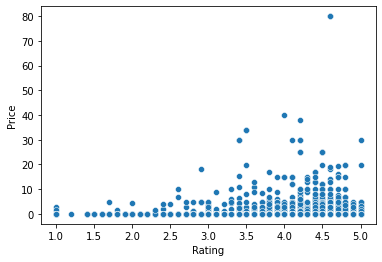

In [49]:
#Make scatter plot/joinplot for Rating vs. Price
sns.scatterplot(x='Rating',y='Price',data=df)

#What pattern do you observe? Does rating increase with price? - Yes.

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

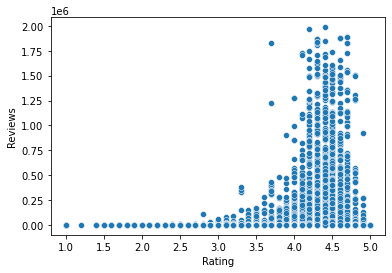

In [50]:
#Make scatter plot/joinplot for Rating vs. Reviews
sns.scatterplot(x='Rating',y='Reviews',data=df)

#Does more review mean a better rating always? - Yes.

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

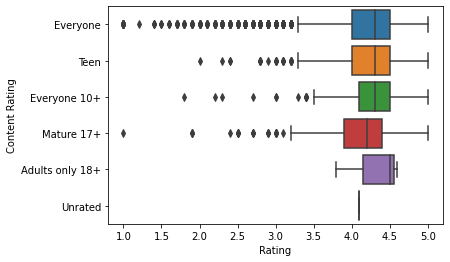

In [51]:
#Make boxplot for Rating vs. Content Rating
sns.boxplot(x='Rating',y='Content Rating',data=df)

#Is there any difference in the ratings? Are some types liked better? Yes there are different ratings. Apps for everyone has more outliers.Adults only 18+ has no outliers and high rating.


<AxesSubplot:xlabel='Rating', ylabel='Category'>

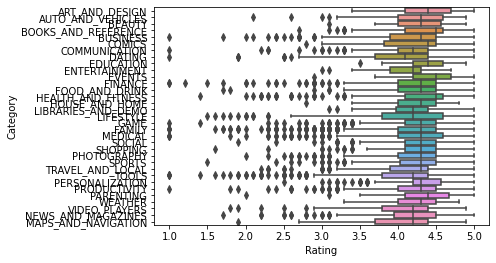

In [52]:
#Make boxplot for Ratings vs. Category
sns.boxplot(x='Rating',y='Category',data=df)

#Which genre has the best ratings? - Events category has best ratings

In [53]:
#8. Data preprocessing
inp1=df

In [54]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
#Reviews and Install have some values that are still relatively very high. 
#Before building a linear regression model, you need to reduce the skew. 
#Apply log transformation (np.log1p) to Reviews and Installs.

In [56]:
inp1.skew()

Rating      -1.791839
Reviews      3.850398
Size         1.640818
Installs     5.074082
Price       16.607603
dtype: float64

In [57]:
reviewskew =np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

In [58]:
reviewskew.skew()

-0.18899117229297321

In [59]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs'] 

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8865, dtype: int64

In [60]:
installsskew.skew()

-0.4280999500951884

In [61]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
#Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [63]:
inp1.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [64]:
inp1.shape

(8865, 8)

In [65]:
#Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [66]:
inp2 = inp1

In [67]:
#Let's apply Dummy EnCoding on Column "Category"
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [68]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,50000000,0.0,Teen,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
inp2.shape

(8865, 40)

In [70]:
#apply dummy encoding on Genre
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual',
       'Casual;Pretend Play', 'Action', 'Puzzle', 'Arcade', 'Music',
       'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Simulation',
       'Board', 'Role Playing', 'Adventure', 'Strategy',
       'Simulation;Education', 'Action;Action & Adventure', 'Trivia',
       'Casual;Brain Games', 'Simulation

In [71]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [72]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Casual;Pretend Play', 'Action',
       'Puzzle', 'Arcade', 'Music', 'Word', 'Racing', 'Sports',
       'Simulation', 'Board', 'Role Playing', 'Adventure', 'Strategy',
       'Trivia', 'Educational;Education', 'Racing;Action & Adventure',
       'Medical', 'Social', 'Shopping', 'Photography', 'Travel & Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Educational', 'Casino'], dtype=object)

In [73]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [74]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,10000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,50000000,0.0,Teen,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#apply dummy encoding on content rating

In [76]:
inp2["Content Rating"].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [77]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,12.281389,25000.0,50000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,6.875232,2800.0,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
#Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [79]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [80]:
d1 = inp2
X = d1.drop('Rating',axis=1)
y = d1['Rating']

Xtrain, Xtest, ytrain, ytest = tts(X,y, test_size=0.3, random_state=5)

In [81]:
model = LR()
model.fit(Xtrain,ytrain)

LinearRegression()

In [86]:
y_pred=model.predict(Xtest)
y_pred

array([4.21705566, 4.10304482, 4.20778243, ..., 4.22219553, 4.14002241,
       4.24227082])

In [84]:
R2_train = model.score(Xtrain,ytrain)*100
print("The R2 value of the Training Set is : {}",R2_train)

The R2 value of the Training Set is : {} 7.871497251770609


In [85]:
R2_test = model.score(Xtest,ytest)*100
print("The R2 value of the Testing Set is : {}",R2_test)

The R2 value of the Testing Set is : {} 6.565312481045693
